In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
df = pd.read_csv('titanic_train.csv') 
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


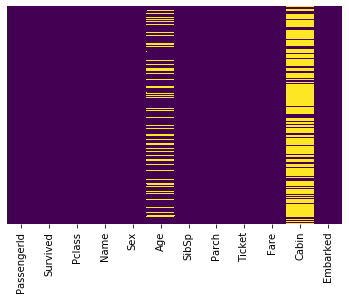

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')     

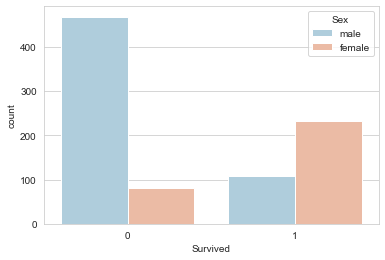

In [6]:
sns.set_style('whitegrid') 
sns.countplot(x='Survived',hue='Sex',palette='RdBu_r',data=df)  

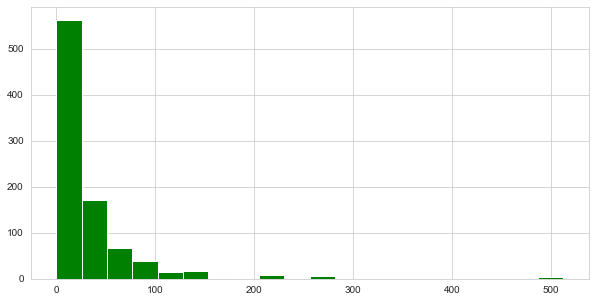

In [7]:
df['Fare'].hist(color='green',bins=0,figsize=(10,5)) 

 CUFFLINKS

In [8]:
import cufflinks as cf 
cf.go_offline() 

In [9]:
df['Fare'].iplot(kind='hist',bins=30,color='green') 

DATA CLEANING

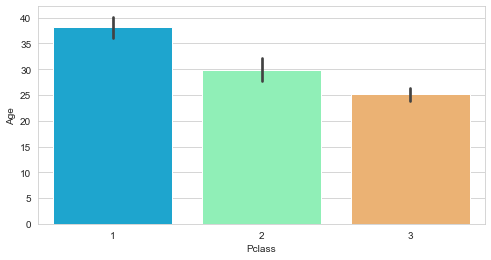

In [11]:
plt.figure(figsize=(8,4)) 
sns.barplot(x='Pclass',y='Age',data=df,palette='rainbow') 

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]  
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37 
        
        elif Pclass==2:
            return 29 
        
        else:
            return 24
        
    else: 
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1) 

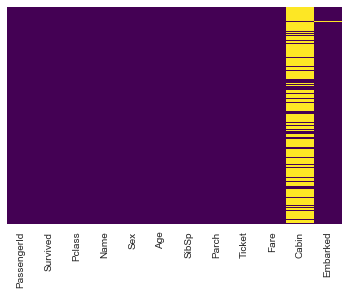

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [6]:
df.drop('Cabin',axis=1,inplace=True)  
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df.dropna(inplace=True) 

BUILDING A LOGISTICAL REGRESSION MODEL

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)  

In [20]:
from sklearn.linear_model import LogisticRegression 